# Linear Regression

Linear regression is a technique for modelling the relationship between one or more predictor (or independent) variables and one or more response (or dependent) variables. 

Our goal using linear regression is to explain the relationship using a linear equation of the form: `m*x+c`

## Using scipy

In [6]:
# Using scipy
import pandas as pd
from scipy.stats import linregress

auto = pd.read_csv('data/auto-mpg.csv')
display(auto.head())
display(auto.shape)
slope, intercept, r_value, p_value, std_err = linregress(auto.acceleration, auto.mpg)
slope, intercept, r_value, p_value, std_err

,mpg,cylinders,displacement,horse_power,weight,acceleration,model_year,car_name
0,18.0,8,307.0,130.0,3504,12.0,70,"\t""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693,11.5,70,"\t""buick skylark 320"""
2,18.0,8,318.0,150.0,3436,11.0,70,"\t""plymouth satellite"""
3,16.0,8,304.0,150.0,3433,12.0,70,"\t""amc rebel sst"""
4,17.0,8,302.0,140.0,3449,10.5,70,"\t""ford torino"""


(398, 8)

(1.1912045293502274,
 4.9697930042539085,
 0.4202889121016507,
 1.8230915350787203e-18,
 0.12923643283101396)

[ 8.  24.8]


Text(0, 0.5, 'mpg')

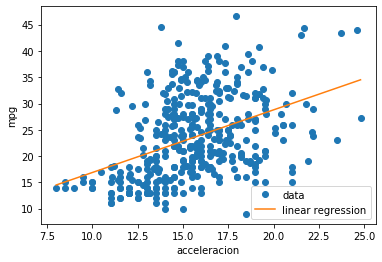

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# The data
plt.plot(auto.acceleration, auto.mpg,'o')

# The line
x = np.linspace(auto.acceleration.min(),auto.acceleration.max(),2)
print(x)
y = slope*x+intercept
plt.plot(x,y)

# The legend
plt.legend(["data","linear regression"])
plt.xlabel("acceleracion")
plt.ylabel("mpg")

0.5025125994295648 -0.15566061953928134 4.5455019681274434e-86


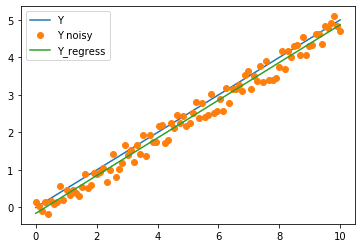

In [3]:
import numpy as np

#s = np.random.randn(100)

x = np.linspace(0,10,100)
y = (0.5*x)
y_noise = y + (np.random.random(len(x))*0.7)-0.5
plt.plot(x,y)
plt.plot(x,y_noise,'o')

slope, intercept, r_value, p_value, std_err = linregress(x,  y_noise)
print(slope, intercept, p_value)
y_predicted = slope*x+intercept
plt.plot(x,y_predicted)


plt.legend(["Y","Y noisy","Y_regress"])


## Using StatsModels

In [4]:
import statsmodels.api as sm

X = sm.add_constant(auto.acceleration) # We must add the intercept using the add_constant function

# Here, we are not limited to only one predictor variable. 
# X = sm.add_constant(auto[['cylinders', 'weight', 'acceleration']])

# What we want to predict
Y = auto.mpg

model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 

# See the model summary
model.summary()


/usr/local/lib/python3.7/site-packages/statsmodels/compat/pandas.py:49: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
/usr/local/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2223: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.177
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     84.96
Date:                Thu, 13 Feb 2020   Prob (F-statistic):           1.82e-18
Time:                        12:28:59   Log-Likelihood:                -1343.9
No. Observations:                 398   AIC:                             2692.
Df Residuals:                     396   BIC:                             2700.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            4.9698      2.043      2.432      0.015       0.953       8.987
acceleration     1.1912      0.129      9.217      0.000       0.937       1.445
==============================================================================
Omnibus:                       17.459   Durbin-Watson:                   0.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               18.214
Skew:                           0.497   Prob(JB):                     0.000111
Kurtosis:                       2.670   Cond. No.                         91.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
for i in range(10):
    print(np.random.random(100).mean())

0.47268236202963637
0.5422164024518213
0.5036620314180409
0.4795425905978864
0.5596916108954174
0.4918956322298695
0.5230469355382695
0.5231678305994477
0.4888805152411879
0.5098384528306069
